In [1]:
import pennylane as qml
from pennylane import numpy as np
import qemzmsepc as qem

Cost after step     5:  2.4250329
Cost after step    10:  0.7431566
Cost after step    15:  0.1890036
Cost after step    20:  0.0553873
Cost after step    25:  0.0845390
Cost after step    30:  0.1546763
Cost after step    35:  0.0204569
Cost after step    40:  0.0644206
Cost after step    45:  0.0556145
Cost after step    50:  0.0736521
Cost after step    55:  0.0543592
Cost after step    60:  0.0164167
Cost after step    65:  0.0604032
Cost after step    70:  0.0503383
Cost after step    75:  0.0330017
Cost after step    80:  0.0211797
Cost after step    85:  0.0700301
Cost after step    90:  0.0642251
Cost after step    95:  0.0392685
Cost after step   100:  0.0450965
Optimized rotation angles: [[[ 0.63600365  1.54443159  0.00502779]
  [ 0.00515575  1.44123163  0.20508686]]

 [[-0.20434944  1.69941807  0.77090383]
  [ 0.27287992  0.25077188  0.88278352]]]


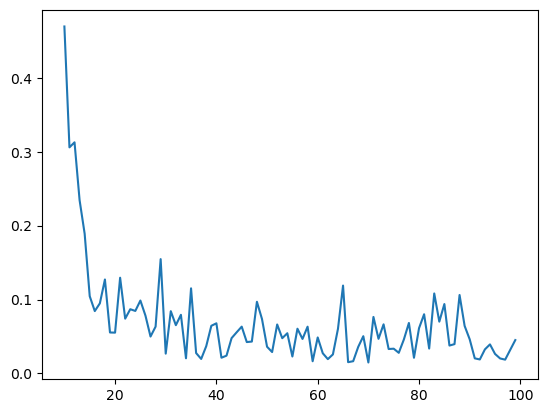

In [2]:
# we introduced noise into the network and trained it without any error mitigation techniques
# to observe the behavior of the Loss function degradation during training.

n_qubits = 2
dev = qml.device('default.mixed', wires=n_qubits)

nqubitspaulimatrices = qem.NqubitsPauliMatrices(n_qubits)
pauli_set_of_n_qubits = nqubitspaulimatrices.get_pauli_matrices_of_n_qubits()
nqubitschannel = qem.NqubitsChannel(n_qubits, pauli_set_of_n_qubits)

nqubitspaulichannel = nqubitschannel.nqubitsrandompaulichannel(p_identity=0.85)
nqubitsdepolarizingchannel = nqubitschannel.nqubitsdepolarizingchannel(0.9)

@qml.qnode(qml.device('default.mixed', wires=n_qubits))
def train_cir_without_qem(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(2))
    qml.QubitChannel(nqubitsdepolarizingchannel, wires=[0, 1])
    qml.QubitChannel(nqubitspaulichannel, wires=[0, 1])
    return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=2)
weights = np.random.random(size=shape)

def cost(x):
    return (train_cir_without_qem(x) - (-1)) ** 2

opt = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 100
params = weights
loss = []

for i in range(steps):
    nqubitspaulichannel = nqubitschannel.nqubitsrandompaulichannel(p_identity=0.85)
    params = opt.step(cost, params)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))
    loss.append(cost(params))
print("Optimized rotation angles: {}".format(params))

# When simulating a complex scenario of time-varying noise channels,
# it can be observed that the descent of the Loss function is relatively unstable
# in the absence of error mitigation techniques.

import matplotlib.pyplot as plt
x = [i for i in range(10, 100)]
y = loss[10:]
plt.plot(x, y)
plt.show()

Cost after step     5:  1.0376973
Cost after step    10:  0.2478895
Cost after step    15:  0.1079869
Cost after step    20:  0.0658235
Cost after step    25:  0.0477664
Cost after step    30:  0.0383228
Cost after step    35:  0.0327434
Cost after step    40:  0.0291742
Cost after step    45:  0.0267633
Cost after step    50:  0.0250708
Cost after step    55:  0.0238488
Cost after step    60:  0.0229481
Cost after step    65:  0.0222736
Cost after step    70:  0.0217627
Cost after step    75:  0.0213720
Cost after step    80:  0.0210712
Cost after step    85:  0.0208383
Cost after step    90:  0.0206573
Cost after step    95:  0.0205161
Cost after step   100:  0.0204057
Optimized rotation angles: [[[ 0.75531758  1.52265861  0.0336511 ]
  [ 0.44331513  1.7640039   0.28316449]]

 [[-0.2816923   1.37606031  0.55878716]
  [ 0.11176278  0.42717966  0.47996333]]]


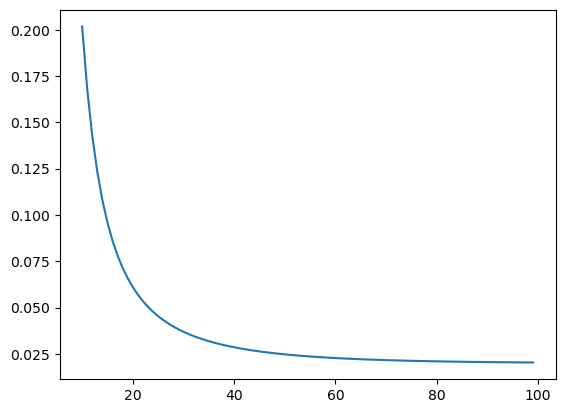

In [3]:
# We set the noise channel as time-invariant and observe the results again.

n_qubits = 2
dev = qml.device('default.mixed', wires=n_qubits)

nqubitspaulimatrices = qem.NqubitsPauliMatrices(n_qubits)
pauli_set_of_n_qubits = nqubitspaulimatrices.get_pauli_matrices_of_n_qubits()
nqubitschannel = qem.NqubitsChannel(n_qubits, pauli_set_of_n_qubits)

nqubitspaulichannel = nqubitschannel.nqubitsrandompaulichannel(p_identity=0.85)
nqubitsdepolarizingchannel = nqubitschannel.nqubitsdepolarizingchannel(0.9)

@qml.qnode(qml.device('default.mixed', wires=n_qubits))
def train_cir_without_qem(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(2))
    qml.QubitChannel(nqubitsdepolarizingchannel, wires=[0, 1])
    qml.QubitChannel(nqubitspaulichannel, wires=[0, 1])
    return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=2)
weights = np.random.random(size=shape)

def cost(x):
    return (train_cir_without_qem(x) - (-1)) ** 2

opt = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 100
params = weights
loss = []

for i in range(steps):
    params = opt.step(cost, params)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))
    loss.append(cost(params))
print("Optimized rotation angles: {}".format(params))

import matplotlib.pyplot as plt
x = [i for i in range(10, 100)]
y = loss[10:]
plt.plot(x, y)
plt.show()

In [4]:
# We estimate the total noise 'p_t' using the QEMZMSEPC method,
# allowing us to incorporate noise 'p_t' into the definition of the Loss function,
# thereby mitigating the impact of noise on quantum machine learning tasks.

operations = ['RX', 'RY', 'RZ', 'RX', 'RY', 'RZ', 'CNOT', 'CNOT',
              'RX', 'RY', 'RZ', 'RX', 'RY', 'RZ', 'CNOT', 'CNOT']
shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=2)
weights = np.random.random(size=shape)
w = weights.copy().reshape(-1)
paras = [[0, w[0]], [0, w[1]], [0, w[2]], [0, w[3]], [0, w[4]], [0, w[5]], [0, 1], [1, 0],
     [0, w[6]], [0, w[7]], [0, w[8]], [0, w[9]], [0, w[10]], [0, w[11]], [0, 1], [1, 0]]
qemzmsepc = qem.QEMZMSEPC(n_qubits)
_, p_t = qemzmsepc.qemzmsepc(operations=operations, paras=paras, dev=dev, p=0.9,
                         kraus_matrices_of_a_pauli_channel=nqubitspaulichannel)
print(p_t)

0.8585782999423189


Cost after step     5:  0.3639456
Cost after step    10:  0.0873779
Cost after step    15:  0.0364191
Cost after step    20:  0.0196189
Cost after step    25:  0.0121856
Cost after step    30:  0.0082794
Cost after step    35:  0.0059825
Cost after step    40:  0.0045209
Cost after step    45:  0.0035345
Cost after step    50:  0.0028381
Cost after step    55:  0.0023284
Cost after step    60:  0.0019443
Cost after step    65:  0.0016478
Cost after step    70:  0.0014141
Cost after step    75:  0.0012268
Cost after step    80:  0.0010743
Cost after step    85:  0.0009485
Cost after step    90:  0.0008435
Cost after step    95:  0.0007551
Cost after step   100:  0.0006798
Optimized rotation angles: [[[0.52916736 0.13476133 0.79350731]
  [0.04293908 0.03848117 0.92735427]]

 [[0.16598421 2.91426895 0.26137958]
  [0.2197847  0.46062441 0.59816803]]]


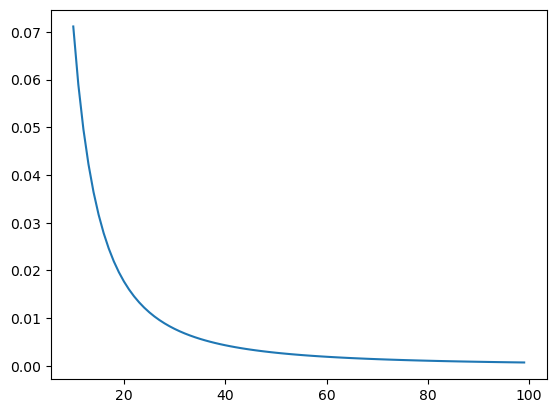

In [5]:
@qml.qnode(qml.device('default.mixed', wires=n_qubits))
def train_cir_with_qem(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(2))
    qml.QubitChannel(nqubitsdepolarizingchannel, wires=[0, 1])
    qml.QubitChannel(nqubitspaulichannel, wires=[0, 1])
    return qml.expval(qml.PauliZ(0)@qml.PauliZ(1))

shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=2)
weights = np.random.random(size=shape)

# We modify the definition of the Loss function
# by dividing the output of the quantum circuit by the noise parameter p_t
# to obtain the expected output of the quantum circuit after error mitigation,
# and then proceed with the Loss calculation.

def cost(x):
    return ((train_cir_with_qem(x) / p_t) - (-1)) ** 2

opt = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 100
params = weights
loss = []
qemzmsepc = qem.QEMZMSEPC(n_qubits)

for i in range(steps):
    params = opt.step(cost, params)
    w = params.copy().reshape(-1)
    paras = [[0, w[0]], [0, w[1]], [0, w[2]], [0, w[3]], [0, w[4]], [0, w[5]], [0, 1], [1, 0],
         [0, w[6]], [0, w[7]], [0, w[8]], [0, w[9]], [0, w[10]], [0, w[11]], [0, 1], [1, 0]]
    nqubitspaulichannel = nqubitschannel.nqubitsrandompaulichannel(p_identity=0.85)
    _, p_t = qemzmsepc.qemzmsepc(operations=operations, paras=paras, dev=dev, p=0.9,
                             kraus_matrices_of_a_pauli_channel=nqubitspaulichannel)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))
    loss.append(cost(params))
print("Optimized rotation angles: {}".format(params))
import matplotlib.pyplot as plt
x = [i for i in range(10, 100)]
y = loss[10:]
plt.plot(x, y)
plt.show()

In [6]:
# From the results, we can observe that the Loss function exhibits a stable decreasing trend
# after error mitigation through the QEMZMSEPC scheme,
# and ultimately, the outcome is better than without error mitigation.